In [1]:
import matplotlib.pyplot as plt 
from torchvision.transforms import ToPILImage
from PIL import Image
import numpy as np

### Test Inference with PSPNet_R101_D8 on LoveDA
#### Model Performance:
"aAcc": 0.7027, 

"mIoU": 0.5186, 

"mAcc": 0.6347, 

"IoU.background": 0.5514, "IoU.building": 0.6424, "IoU.road": 0.5554, "IoU.water": 0.6803, "IoU.barren": 0.2702, "IoU.forest": 0.4156, "IoU.agricultural": 0.5153, 

"Acc.background": 0.8768, "Acc.building": 0.7855, "Acc.road": 0.6255, "Acc.water": 0.764, "Acc.barren": 0.3077, "Acc.forest": 0.5287, "Acc.agricultural": 0.5546}

In [3]:
from mmseg.apis import MMSegInferencer
# Load model in background from model zoo
inferencer = MMSegInferencer(model='pspnet_r101-d8_4xb4-80k_loveda-512x512')

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r101-d8_512x512_80k_loveda/pspnet_r101-d8_512x512_80k_loveda_20211104_153212-1c06c6a8.pth
06/05 11:03:47 - mmengine - WARNING - Failed to search registry with scope "mmseg" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmseg" is a correct scope, or whether the registry is initialized.
06/05 11:03:47 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


### Test Inference on Munich

In [4]:
classes=('background', 'building', 'road', 'water', 'barren', 'forest',
            'agricultural')
palette=[[255, 255, 255], [255, 0, 0], [255, 255, 0], [0, 0, 255],
            [159, 129, 183], [0, 255, 0], [255, 195, 128]]

idx2rgb = {i:palette[i] for i in range(len(palette))}

def map_label2rgb(label_mask:np.array):
    rgb = np.zeros((label_mask.shape[0], label_mask.shape[1], 3), dtype='uint8')
    for i in range(label_mask.shape[0]):
        for j in range(label_mask.shape[1]):
            try:
                rgb[i,j,:] = idx2rgb[label_mask[i,j].item()]
            except:
                rgb[i,j,:] = [0,0,0]
    return rgb

Inference ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   

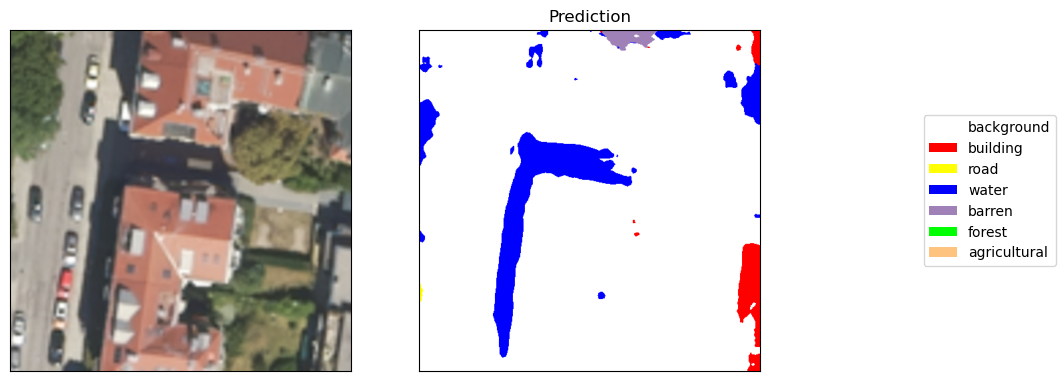

In [5]:
img_path = '/pfs/work7/workspace/scratch/tu_zxmav84-ds_project/data/orthophotos/patched/32692_5337_patch_2_9.tif'

#  Read Image
img = Image.open(img_path)
img = img.resize((512, 512))
img.save('resized.png')

# Get prediction
pred = inferencer('resized.png', show=True)
mask = pred['predictions']
mask_rgb = map_label2rgb(mask)

# Visualize prediction
fig, ax = plt.subplots(1,2, figsize=(12,12))
ax[0].imshow(img)
ax[1].imshow(mask_rgb)
ax[1].set_title('Prediction')

# Create a legend using the extracted colors and labels
colors = [(r / 255, g / 255, b / 255, 1) for r, g, b in palette]
patches = [plt.Rectangle((0, 0), 1, 1, fc=color) for color in colors]
fig.legend(patches, classes, loc=7)
fig.subplots_adjust(right=0.75)

[ax[i].get_xaxis().set_ticks([]) for i in range(ax.shape[0])]
[ax[i].get_yaxis().set_ticks([]) for i in range(ax.shape[0])]
plt.show()